In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sklearn
from statsmodels.tsa.arima_model import ARIMA
import yfinance


In [2]:
raw_data = yfinance.download(tickers = '^GSPC ^FTSE ^N225 ^GDAXI'
,start="1994-01-07",end = "2018-01-29", interval = "1d",group_by="ticker",
auto_adjust=True,treads = True)

[*********************100%***********************]  4 of 4 completed


In [26]:
data_copy = raw_data.copy()

In [27]:
data_copy['spx'] = data_copy['^GSPC'].Close[:]
data_copy['dax'] = data_copy['^GDAXI'].Close[:]
data_copy['ftse'] = data_copy['^FTSE'].Close[:]
data_copy['nikkei'] = data_copy['^N225'].Close[:]

In [28]:
data_copy['returns_spx'] = data_copy.spx.pct_change(1)*100
data_copy['returns_ftse'] = data_copy.ftse.pct_change(1)*100
data_copy['returns_dax'] = data_copy.dax.pct_change(1)*100
data_copy['returns_nikkei'] = data_copy.nikkei.pct_change(1)*100

In [29]:
data_copy = data_copy.iloc[1:]
data_copy.drop(['^GSPC','^N225','^GDAXI','^FTSE'],axis = 1,inplace = True)
data_copy = data_copy.asfreq('b')
data_copy = data_copy.fillna(method = 'ffill')

In [30]:
size = int(len(data_copy)*0.8)
data_copy_train,data_copy_test = data_copy.iloc[:size],data_copy.iloc[size:]

In [31]:
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA

In [32]:
ar_model = ARIMA(data_copy_train.ftse,order = (1,0,0))
ar_results = ar_model.fit()

In [33]:
start = "2014-07-15"
end = "2015-01-01"

In [34]:
data_copy_train.tail()

,spx,dax,ftse,nikkei,returns_spx,returns_ftse,returns_dax,returns_nikkei
,,,,,,,,
Date,,,,,,,,
2013-03-29,1569.189941,7795.310059,6411.700195,12397.910156,0.000000,0.000000,0.000000,0.502192
2013-04-01,1562.170044,7795.310059,6411.700195,12135.019531,-0.447358,0.000000,0.000000,-2.120443
2013-04-02,1570.250000,7943.870117,6490.700195,12003.429688,0.517226,1.232122,1.905762,-1.084381
2013-04-03,1553.689941,7874.750000,6420.299805,12362.200195,-1.054613,-1.084635,-0.870106,2.988900
2013-04-04,1559.979980,7817.390137,6344.100098,12634.540039,0.404845,-1.186856,-0.728402,2.203005


In [35]:
start = "2013-04-05"
end = "2019-01-01"

In [36]:
data_pred = ar_results.predict(start = start,end = end)

Text(0.5, 1.0, 'Prediction vs Actuals FTSE')

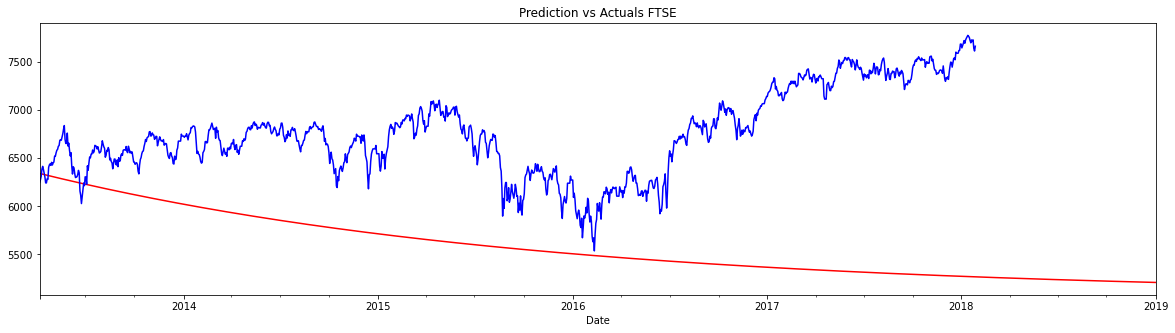

In [37]:
data_pred[start:end].plot(figsize = (20,5),color = 'red')
data_copy_test.ftse[start:end].plot(color = 'blue')
plt.title('Prediction vs Actuals FTSE')


In [38]:
## Using returns for forecasting
ar_model = ARIMA(data_copy_train.returns_ftse,order = (1,0,0))
ar_results = ar_model.fit()

Text(0.5, 1.0, 'Prediction vs Actuals FTSE')

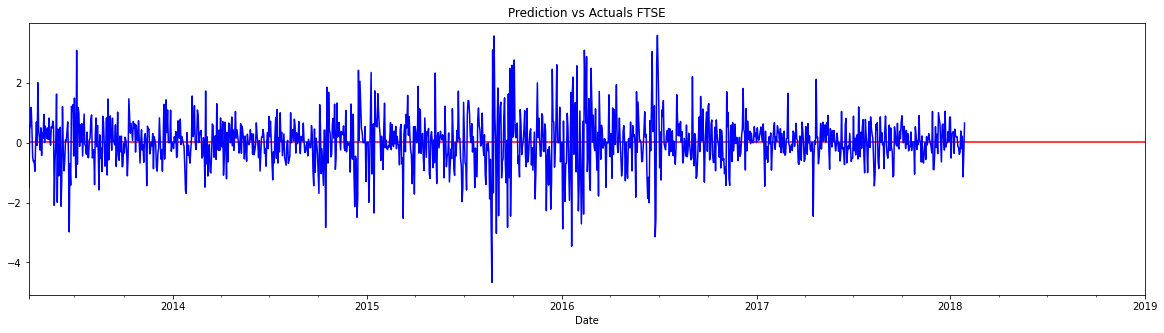

In [41]:
data_pred = ar_results.predict(start = start,end = end)
data_pred[start:end].plot(figsize = (20,5),color = 'red')
data_copy_test.returns_ftse[start:end].plot(color = 'blue')
plt.title('Prediction vs Actuals FTSE')
